#  SHIVAM SINGH
#  1001766008
## Data Mining Assignment 02
### k Nearest Neighbors

In [15]:
import pandas as pd
import numpy as np
import os
from collections import Counter
from sklearn import preprocessing

### Method returning kNN

In [16]:
class KMeanClassifier():
    def __init__(self, k, dataset, labels, normalized = True, distance_type = 'euclidean'):
        self.k = k
        if normalized:
            self.dataset = self.normalize(pd.DataFrame(dataset))
        else:
            self.dataset = pd.DataFrame(dataset)

        self.labels = labels
        self.normalized = normalized
        self.distance_type = distance_type
    
#Returning the Mode of k labels
    def most_frequent(self, List): 
        occurence_count = Counter(List) 
        return occurence_count.most_common(1)[0][0] 

#Returning Euclidean Distance    
    def euclidean(self, v1, v2):
        euclidean_distance = np.sqrt(np.sum((np.array(v1)-np.array(v2))**2))
        return euclidean_distance
    
#Returning Normalized Euclidean Distance        
    def normalize(self, dataset):
        for col_name in dataset:
            dataset[col_name] = (dataset[col_name] - dataset[col_name].mean()) / dataset[col_name].std()
        return dataset
    
#Finding Cosine Similarities
    def cosine_similarity(self, a, b):
#         Source Credit : https://skipperkongen.dk/2018/09/19/cosine-similarity-in-python/
        # manually compute cosine similarity
        dot = np.dot(a, b)
        norma = np.linalg.norm(a)
        normb = np.linalg.norm(b)
        cos = dot / (norma * normb)
        return cos

    def test(self, dataset):
        classes = []
        if(self.normalized):
            dataset = self.normalize(pd.DataFrame(dataset))
        else:
            dataset = pd.DataFrame(dataset)
        for index, i in dataset.iterrows():
            distances = []
            smallest = []
            smallest_pos = []
            for index2, j in self.dataset.iterrows():
                if self.distance_type.lower() == 'euclidean':
                    dist = self.euclidean(i,j)
                elif self.distance_type.lower() == 'cosine':
                    dist = (1-self.cosine_similarity(i,j))
                distances.append((self.labels[index2],dist))
            distances.sort(key = lambda x: x[1])
            k_elements = [i[0] for i in distances[0:self.k]]
            classes.append(self.most_frequent(k_elements))
        return np.array(classes)

### Importing data and returning modified datasets

In [17]:
def importData(file):
    iris_dataset = pd.read_csv(file)
    iris_dataset['species']=iris_dataset['class']
    iris_dataset['class'] = preprocessing.LabelEncoder().fit_transform(iris_dataset['class'])

    # Seperate dev and test data sets randomly
    dev_set = iris_dataset.sample(frac = 0.75, random_state = 5)
    test_set = iris_dataset.drop(dev_set.index)

    # Seperate class and species from dev set
    dev_set_class = dev_set.pop('class')
    dev_set_species = dev_set.pop('species')

    # Remove class and species from test set
    test_set_class = test_set.pop('class')
    test_set_species = test_set.pop('species')
    
    return dev_set,test_set,dev_set_class,dev_set_species,test_set_class,test_set_species


### Implementing kNN for differernt values of k

In [18]:
kvals = [1,3,5,7]
methods = [('euclidean', True), ('euclidean',False), ('cosine', False)]
labels = []
accuracies = []
kv = []
for k in kvals:
    for method,normalized in methods:
        dev_set,test_set,dev_set_class,dev_set_species,test_set_class,test_set_species = importData("iris_data.csv")

        # develop KMeanClassifier with develop set, and k value
        iris_knn_normalized_cosine = KMeanClassifier(k, dev_set, dev_set_class, normalized=normalized, distance_type = method)

        # Test knn model with test dataset and get labels
        y_pred_normalized_cosine = iris_knn_normalized_cosine.test(test_set)

        # test_set_species turned to list to compare with predictor
        y_true = np.array(test_set_class)

        accuracies.append(sum(y_true==y_pred_normalized_cosine)/len(y_true))
        label = method
        if normalized == True:
            label += '_normalized'
        labels.append(label)
        kv.append(k)

In [19]:
print(accuracies)
print(labels)
print(kv)

[0.868421052631579, 0.9473684210526315, 0.9736842105263158, 0.8947368421052632, 0.9473684210526315, 0.9473684210526315, 0.8947368421052632, 0.9473684210526315, 0.9736842105263158, 0.9210526315789473, 0.9473684210526315, 0.9736842105263158]
['euclidean_normalized', 'euclidean', 'cosine', 'euclidean_normalized', 'euclidean', 'cosine', 'euclidean_normalized', 'euclidean', 'cosine', 'euclidean_normalized', 'euclidean', 'cosine']
[1, 1, 1, 3, 3, 3, 5, 5, 5, 7, 7, 7]


### Plotting Accuracies for all K values with different Distance Metrics

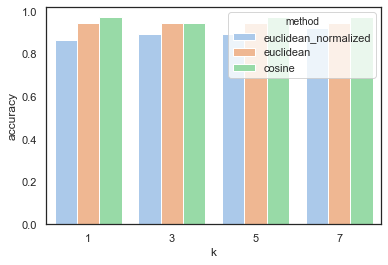

In [20]:
import seaborn as sns

result_df = pd.DataFrame({'k': kv, 'accuracy': accuracies, 'method': labels})

sns.set(style="white")
ax = sns.barplot(x="k", y="accuracy", hue="method",palette='pastel', data=result_df)

In [21]:
result_df_group_by_k = result_df.groupby('k', as_index=False).mean()
result_df_group_by_k['k'] = result_df_group_by_k['k'].astype(str)

# Testing the result for all k values
- Best result obtained with k = 7

[(0.9, 1)]

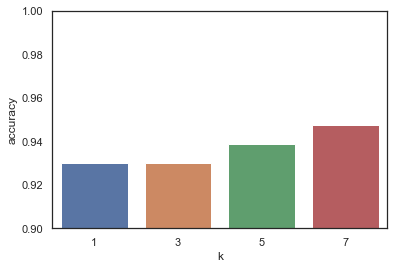

In [22]:
sns.set(style="white")
ax = sns.barplot(x="k", y="accuracy", data=result_df_group_by_k)
ax.set(ylim=(0.9, 1))

In [23]:
result_df_group_by_method = result_df.groupby('method', as_index=False).mean()
result_df_group_by_method['k'] = result_df_group_by_k['k'].astype(str)

In [24]:
result_df_group_by_method

,method,k,accuracy
0,cosine,1,0.967105
1,euclidean,3,0.947368
2,euclidean_normalized,5,0.894737


# Testing Mean score of all methods
- Best Method that we observe is cosine method

[(0.8, 1)]

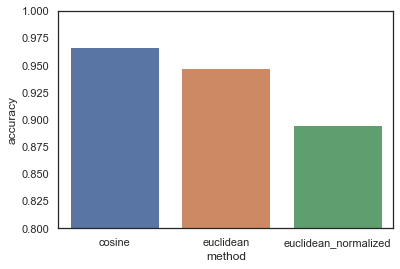

In [25]:
sns.set(style="white")
ax = sns.barplot(x="method", y="accuracy", data=result_df_group_by_method)
ax.set(ylim=(0.8, 1))

# Best Method - Cosine
## With k = 1, 5 or 7 

[(0.94, 0.98)]

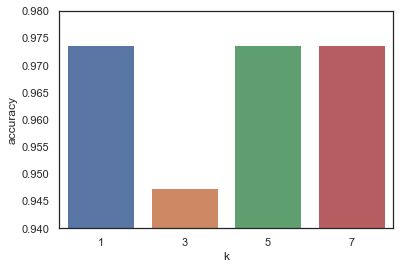

In [26]:
result_cosine = result_df[result_df['method']=='cosine']
sns.set(style="white")
ax = sns.barplot(x="k", y="accuracy", data=result_cosine)
ax.set(ylim=(0.94, 0.98))

# BEST RESULT 

In [27]:
# 
print('BEST RESULT')
print(result_df.iloc[result_df['accuracy'].idxmax()])

BEST RESULT
k                  1
accuracy    0.973684
method        cosine
Name: 2, dtype: object
